In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [24]:
# Cargar dataset
df = pd.read_csv('/Users/danielalopez/Downloads/ab_test_data.csv')
df.head()

,user_id,group,time_on_page_seconds,converted,revenue
0,1,A,83.55,0,0.0
1,2,B,72.00,0,0.0
2,3,A,87.60,0,0.0
3,4,A,92.21,0,0.0
4,5,A,91.20,0,0.0


In [25]:
df.info()
# distribución por grupo
df['group'].value_counts()
# porcentaje de conversión por grupo
df.groupby('group')['converted'].mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               2000 non-null   int64  
 1   group                 2000 non-null   object 
 2   time_on_page_seconds  2000 non-null   float64
 3   converted             2000 non-null   int64  
 4   revenue               2000 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 78.3+ KB


group
A    0.118110
B    0.152439
Name: converted, dtype: float64

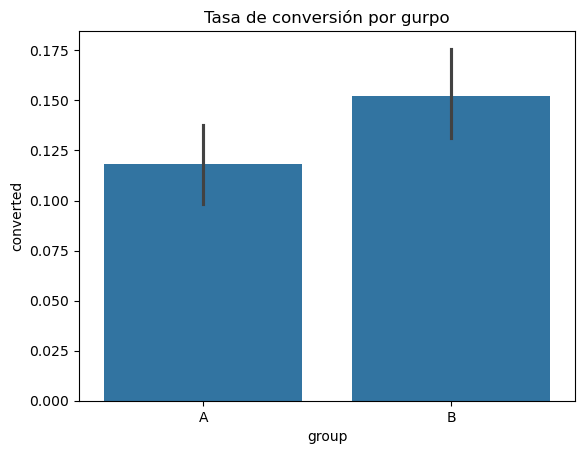

In [27]:
# conversiones por grupo 
sns.barplot(data=df, x='group', y='converted')
plt.title("Tasa de conversión por gurpo")
plt.show()

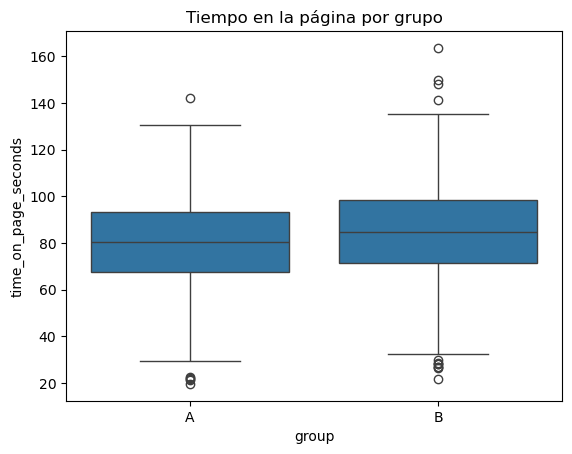

In [28]:
# Tiempo promedio en la página
sns.boxplot(data=df, x='group', y='time_on_page_seconds')
plt.title("Tiempo en la página por grupo")
plt.show()

In [29]:
# Prueba de diferencia en proporciones 

# Datos
successes = [conv_A.sum(), conv_B.sum()]  # Éxitos (conversiones)
samples = [len(conv_A), len(conv_B)]      # Tamaño de muestra

# Prueba de proporciones (z-test)
z, p = proportions_ztest(successes, samples)
print(f"Z = {z:.2f}, p = {p:.4f}")


Z = -2.25, p = 0.0247


In [30]:
#Prueba de diferencia de ingresos
revenue_A = df[(df['group'] == 'A') & (df['converted'] == 1)]['revenue']
revenue_B = df[(df['group'] == 'B') & (df['converted'] == 1)]['revenue']

# Prueba t para diferencia de medias
t, p_revenue = stats.ttest_ind(revenue_A, revenue_B, equal_var=False)
print(f"T = {t:.2f}, p = {p_revenue:.4f}")

T = 1.64, p = 0.1027


In [31]:
# ROI 
valor_conversion = 50 
costo_implementacion = 2000 

ingresos_A = conv_A.sum() * valor_conversion
ingresos_B = conv_B.sum() * valor_conversion

roi = (ingresos_B - ingresos_A - costo_implementacion) / costo_implementacion

print(f"\nIngresos A: ${ingresos_A:,.0f}")
print(f"Ingresos B: ${ingresos_B:,.0f}")
print(f"ROI de implementar B vs A: {roi:.2%}")


Ingresos A: $6,000
Ingresos B: $7,500
ROI de implementar B vs A: -25.00%
